In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

## ジョブスケジューリングと区間グラフ

In [2]:
# 区間の集合
interval_set = [(0,2), (1,5), (3,13), (4,7), (6,9), (8,11), (10,12)]

In [3]:
# 区間グラフの作成
def generate_interval_graph(intervals):
    G = nx.Graph()
    G.add_nodes_from(intervals)
    for interval1 in intervals:
        for interval2 in intervals:
            if interval1 != interval2:
                if (interval1[0] <= interval2[0] and interval2[0] <= interval1[1]) or (interval2[0] <= interval1[0] and interval1[0] <= interval2[1]):
                        G.add_edge(interval1, interval2)
    return G

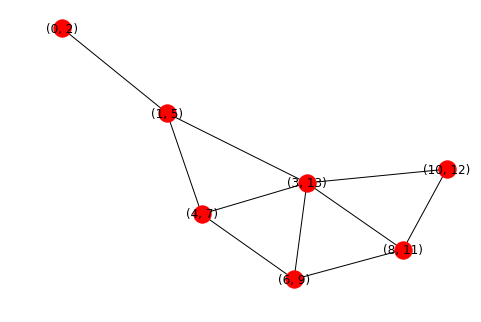

In [4]:
G1 = generate_interval_graph(interval_set)
nx.draw(G1, with_labels=True)

In [5]:
# 区間グラフの染色数の計算 (区間の集合を引数として与える)
def chromatic_number_intervals(intervals):
    G = generate_interval_graph(intervals)
    p = G.nodes()
    p = sorted(p, key = lambda interval: interval[1]) # 区間右端の値でソート
    my_order = list(p)
    d = nx.coloring.greedy_color(G, lambda G, colors: my_order)
    return len(set(d.values()))

In [6]:
chromatic_number_intervals(interval_set)

3

## 周波数割当と単位円グラフの彩色

In [7]:
unit_disk_set = [(0.0,0.0), (0.5, 0.8), (1.5, 0.3), (3.0,0.2), (3.5, 1.0), (4.5, 0.5)]

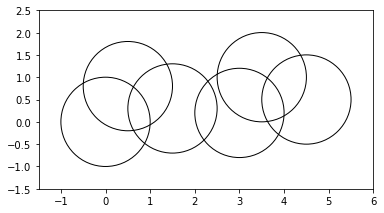

In [8]:
fig, ax = plt.subplots() 
xmin = 0.0
xmax = 0.0
ymin = 0.0
ymax = 0.0
for c in unit_disk_set:
    ax.add_artist(plt.Circle(c, 1.0, fill=False))
    if c[0] > xmax: 
        xmax = c[0]
    if c[0] < xmin:
        xmin = c[0]
    if c[1] > ymax:
        ymax = c[1]
    if c[1] < ymin:
        ymin = c[1] 
plt.xlim(xmin-1.5, xmax+1.5)
plt.ylim(ymin-1.5, ymax+1.5)
ax.set_aspect('equal')

In [9]:
# 単位円グラフの作成 (半径は1)
def generate_unit_disk_graph(unitdisks):
    rad = 1.0
    G = nx.Graph()
    G.add_nodes_from(unitdisks)
    for d1 in unitdisks:
        for d2 in unitdisks:
            if d1 != d2:
                if pow(d1[0]-d2[0], 2.0) + pow(d1[1]-d2[1], 2.0) <= pow(2*rad, 2.0):
                        G.add_edge(d1, d2)
    return G

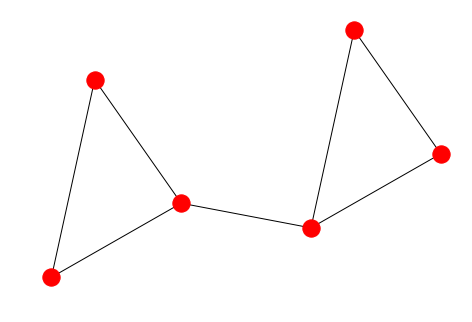

In [10]:
G2 = generate_unit_disk_graph(unit_disk_set)
mypos2 = {}
for c in unit_disk_set:
    mypos2[c] = c
nx.draw(G2, pos=mypos2)

In [11]:
def coloring_unit_disk_graph_from_left_to_right(unitdisks):
    G = generate_unit_disk_graph(unitdisks)
    p = G.nodes()
    p = sorted(p, key = lambda disk: disk[0]) # 円の中心のx座標でソート
    my_order = list(p)
    d = nx.coloring.greedy_color(G, lambda G, colors: my_order)
    return len(set(d.values()))

In [12]:
coloring_unit_disk_graph_from_left_to_right(unit_disk_set)

3